<a href="https://colab.research.google.com/github/ajeunel/Risk_Assessment_Bias/blob/main/VI_SPDAT_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning for Preprocessing Preparation


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Uploading the file and printing the first few rows
df = pd.read_csv("SPDAT_Dataset.csv")
print(df.head())

   Unique_client_ID Race/Ethnicity Veteran status  SPA  Gender  \
0                 1         Latino             No  8.0  Female   
1                 3         Latino             No  2.0    Male   
2                 4          White             No  4.0    Male   
3                 6          Black            Yes  4.0    Male   
4                 7          Black             No  4.0  Female   

  Age_group_at_assessment                                  Intervention  \
0                   25-44  Matched to Permanent Housing, Not Yet Housed   
1                   25-44     Exited to an other or unknown destination   
2                   45-59   Currently active in "Services Only" program   
3                   45-59             Exited to a temporary destination   
4                     60+                            Permanently Housed   

   InterventionYear  AssessmentPredatesIntervention  \
0            2020.0                            True   
1            2018.0                       

In [ ]:
# Printing the last few rows
print(df.tail())

        Unique_client_ID Race/Ethnicity Veteran status  SPA  Gender  \
139926            160736          Asian             No  2.0    Male   
139927            160737          White             No  6.0  Female   
139928            160738         Latino             No  2.0    Male   
139929            160739         Latino             No  3.0    Male   
139930            160740         Latino             No  4.0    Male   

       Age_group_at_assessment  \
139926                   25-44   
139927                   18-24   
139928                   25-44   
139929                   18-24   
139930                   25-44   

                                           Intervention  InterventionYear  \
139926  Currently active in "Coordinated Entry" program               NaN   
139927  Currently active in "Coordinated Entry" program               NaN   
139928  Currently active in "Coordinated Entry" program               NaN   
139929  Currently active in "Emergency Shelter" program     

In [ ]:
# Generating the descriptive statistics for the dataset
print(df.describe())

       Unique_client_ID            SPA  InterventionYear  AssessmentYear  \
count     139931.000000  137750.000000      86952.000000   139931.000000   
mean       80844.469103       4.529909       2019.665252     2019.051382   
std        46970.090400       1.978392          2.142848        1.842987   
min            1.000000       1.000000       1900.000000     2016.000000   
25%        39388.500000       3.000000       2018.000000     2018.000000   
50%        81386.000000       4.000000       2020.000000     2019.000000   
75%       122024.500000       6.000000       2021.000000     2021.000000   
max       160740.000000       8.000000       2022.000000     2022.000000   

         AcuityScore    TOTAL_SCORE  GENERAL_SUB_SCORE  HISTORY_SUB_SCORE  \
count  139931.000000  139931.000000      139931.000000      139931.000000   
mean        8.769837       8.762526           0.169255           1.561348   
std         3.793505       3.802186           0.374978           0.592348   
min    

In [ ]:
# Determining whether any null values exist
df.isna().sum()

,0
Unique_client_ID,0
Race/Ethnicity,0
Veteran status,0
SPA,2181
Gender,0
Age_group_at_assessment,279
Intervention,0
InterventionYear,52979
AssessmentPredatesIntervention,0
AssessmentName,0


In [ ]:
# Dropping data not relevant to the model and data with high null values and filling NA values
df = df.drop(['CALC_SOCIALIZATION_USE_TRAUMA','AssessmentPredatesIntervention','InterventionYear','Intervention','Veteran status','AssessmentName','AssessmentYear','Acuity', 'AcuityScore'], axis=1)

In [ ]:
df.fillna("NA", inplace=True)

<ipython-input-7-432699f25a48>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("NA", inplace=True)


In [ ]:
# In an effort to simplify the dataset for analysis, this project will only utilize a few variables. I am removing alternative demograhic information that will not be testing. This project focuses on the relationship between race, gender, risk and wellness scores.
# Keeping only rows where Gender is "Male" or "Female" and Race is as listed below

df = df[df["Gender"].isin(["Male", "Female"])]
df = df[df["Race/Ethnicity"].isin(["Black", "White","Other","Latino"])]

print(df.head())

   Unique_client_ID Race/Ethnicity  SPA  Gender Age_group_at_assessment  \
0                 1         Latino  8.0  Female                   25-44   
1                 3         Latino  2.0    Male                   25-44   
2                 4          White  4.0    Male                   45-59   
3                 6          Black  4.0    Male                   45-59   
4                 7          Black  4.0  Female                     60+   

   TOTAL_SCORE  GENERAL_SUB_SCORE  HISTORY_SUB_SCORE  RISKS_SUB_SCORE  \
0           11                  0                  2                4   
1           15                  0                  2                4   
2           12                  0                  2                3   
3            7                  0                  1                1   
4           10                  1                  1                3   

   SOCIALIZATION_SUB_SCORE  ...  CALC_SOCIALIZATION_MEANINGFUL_DAILY_ACTIVITY  \
0                        4  .

In [ ]:
# In order to perform the regressions, one-hot encoding is used for catagorical values to assign binary values for race and gender.
df = pd.get_dummies(df, columns=["Gender", "Race/Ethnicity"], drop_first=True)

print(df.head())

   Unique_client_ID  SPA Age_group_at_assessment  TOTAL_SCORE  \
0                 1  8.0                   25-44           11   
1                 3  2.0                   25-44           15   
2                 4  4.0                   45-59           12   
3                 6  4.0                   45-59            7   
4                 7  4.0                     60+           10   

   GENERAL_SUB_SCORE  HISTORY_SUB_SCORE  RISKS_SUB_SCORE  \
0                  0                  2                4   
1                  0                  2                4   
2                  0                  2                3   
3                  0                  1                1   
4                  1                  1                3   

   SOCIALIZATION_SUB_SCORE  WELLNESS_SUB_SCORE  CALC_TOTAL_SCORE  ...  \
0                        4                   1                11  ...   
1                        4                   5                15  ...   
2                        2   

In [ ]:
# Ensuring that the one-hot encoding assigned numeric values to the variables
df.dtypes

,0
Unique_client_ID,int64
SPA,object
Age_group_at_assessment,object
TOTAL_SCORE,int64
GENERAL_SUB_SCORE,int64
HISTORY_SUB_SCORE,int64
RISKS_SUB_SCORE,int64
SOCIALIZATION_SUB_SCORE,int64
WELLNESS_SUB_SCORE,int64
CALC_TOTAL_SCORE,int64


In [ ]:
# Because the regression cannot be performed on data other than integers, boolean and other non-numeric values are changed into numeric values.
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df.dtypes

<ipython-input-11-5746bf5cf170>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,0
Unique_client_ID,int64
SPA,object
Age_group_at_assessment,object
TOTAL_SCORE,int64
GENERAL_SUB_SCORE,int64
HISTORY_SUB_SCORE,int64
RISKS_SUB_SCORE,int64
SOCIALIZATION_SUB_SCORE,int64
WELLNESS_SUB_SCORE,int64
CALC_TOTAL_SCORE,int64


In [ ]:
# The dataset is now cleaned and to prepared for preprocessing.
df.to_csv("Clean_data_for_model.csv", index=False)

## Data Preprocessing


In [ ]:
# Loading the cleaned and revised data set and printing the first few rows
df = pd.read_csv("Clean_data_for_model.csv")
df.head()

,Unique_client_ID,SPA,Age_group_at_assessment,TOTAL_SCORE,GENERAL_SUB_SCORE,HISTORY_SUB_SCORE,RISKS_SUB_SCORE,SOCIALIZATION_SUB_SCORE,WELLNESS_SUB_SCORE,CALC_TOTAL_SCORE,...,CALC_WELLNESS_PHYSICAL_HEALTH,CALC_WELLNESS_SUBSTANCE_USE,CALC_WELLNESS_MENTAL_HEALTH,CALC_WELLNESS_TRIMORBIDITY,CALC_WELLNESS_MEDICATIONS,CALC_WELLNESS_ABUSE_AND_TRAUMA,Gender_Male,Race/Ethnicity_Latino,Race/Ethnicity_Other,Race/Ethnicity_White
0,1,8.0,25-44,11,0,2,4,4,1,11,...,0,0,0,0,0,1.0,0,1,0,0
1,3,2.0,25-44,15,0,2,4,4,5,15,...,1,1,1,1,0,1.0,1,1,0,0
2,4,4.0,45-59,12,0,2,3,2,5,12,...,1,1,1,1,0,1.0,1,0,0,1
3,6,4.0,45-59,7,0,1,1,2,3,7,...,1,0,1,0,1,0.0,1,0,0,0
4,7,4.0,60+,10,1,1,3,2,3,10,...,1,0,0,0,1,1.0,0,0,0,0


In [ ]:
#Dropping additonal columns that clutter the dataset (Dropping data should have been completed during the cleaning stage, but occurs here to assist with faster processing and reducing visual clutter)
df = df.drop(columns=['SPA', 'CALC_WELLNESS_ABUSE_AND_TRAUMA'])


In [ ]:
# Creating a binary target variable for analysis. A score of 8 or above is considered 'high risk'.
df['High_Risk'] = (df['TOTAL_SCORE'] >= 8).astype(int)
df[['TOTAL_SCORE', 'High_Risk']].head()


,TOTAL_SCORE,High_Risk
0,11,1
1,15,1
2,12,1
3,7,0
4,10,1


## Defining and Scaling Features


In [ ]:
# Define wellness feature group
wellness_features = ['WELLNESS_SUB_SCORE', 'RISKS_SUB_SCORE', 'SOCIALIZATION_SUB_SCORE', 'HISTORY_SUB_SCORE']

# Identify race and gender encoded columns
race_gender_features = [col for col in df.columns if 'Race/Ethnicity' in col or 'Gender' in col]

# Combine race and gender features for full feature set
combined_features = wellness_features + race_gender_features

# Display feature groups
print("Wellness Features:", wellness_features)
print("Race and Gender Features:", race_gender_features)


Wellness Features: ['WELLNESS_SUB_SCORE', 'RISKS_SUB_SCORE', 'SOCIALIZATION_SUB_SCORE', 'HISTORY_SUB_SCORE']
Race and Gender Features: ['Gender_Male', 'Race/Ethnicity_Latino', 'Race/Ethnicity_Other', 'Race/Ethnicity_White']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load data
df = pd.read_csv("Clean_data_for_model.csv")
df = df.drop(columns=['SPA', 'CALC_WELLNESS_ABUSE_AND_TRAUMA'])
df['High_Risk'] = (df['TOTAL_SCORE'] >= 8).astype(int)

# Define the feature groups displayed above
wellness_features = ['WELLNESS_SUB_SCORE', 'RISKS_SUB_SCORE', 'SOCIALIZATION_SUB_SCORE', 'HISTORY_SUB_SCORE']
race_gender_features = [col for col in df.columns if 'Race/Ethnicity' in col or 'Gender' in col]
combined_features = wellness_features + race_gender_features

# Select combined features for scaling
X = df[combined_features]

# Standardization (Z-score scaling)
standard_scaler = StandardScaler()
X_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(X), columns=X.columns)
print("Standard Scaled Summary:")
print(X_standard_scaled.describe().T)

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(X), columns=X.columns)
print("\nMin-Max Scaled Summary:")
print(X_minmax_scaled.describe().T)



Standard Scaled Summary:
                            count          mean       std       min       25%  \
WELLNESS_SUB_SCORE       131813.0 -9.875462e-17  1.000004 -1.488307 -0.937178   
RISKS_SUB_SCORE          131813.0 -7.220623e-17  1.000004 -1.415851 -0.688723   
SOCIALIZATION_SUB_SCORE  131813.0  8.112757e-17  1.000004 -2.057326 -0.336577   
HISTORY_SUB_SCORE        131813.0 -6.172164e-17  1.000004 -2.645367 -0.953369   
Gender_Male              131813.0 -8.168010e-17  1.000004 -1.359200 -1.359200   
Race/Ethnicity_Latino    131813.0 -4.312429e-18  1.000004 -0.675408 -0.675408   
Race/Ethnicity_Other     131813.0 -1.765401e-17  1.000004 -0.176198 -0.176198   
Race/Ethnicity_White     131813.0  3.697908e-17  1.000004 -0.552890 -0.552890   

                              50%       75%       max  
WELLNESS_SUB_SCORE       0.165080  0.716209  1.818467  
RISKS_SUB_SCORE          0.038405  0.765533  1.492661  
SOCIALIZATION_SUB_SCORE -0.336577  0.523798  2.244547  
HISTORY_SUB_SCORE    

## Visuaizations for Patterns and Biases- Exploring the dataset to reveal potential patterns and disparities


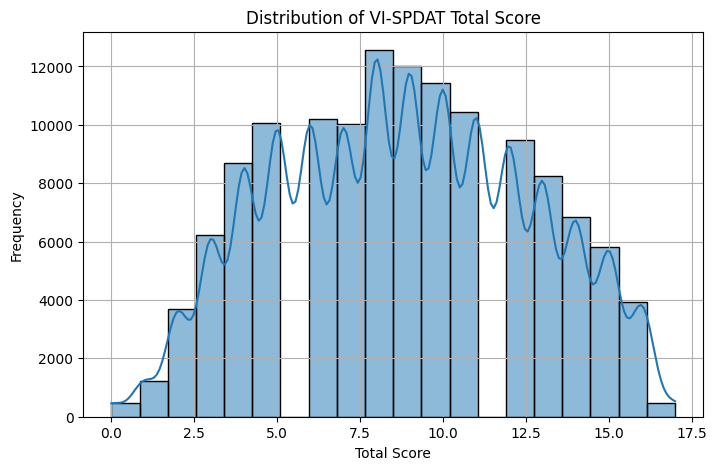

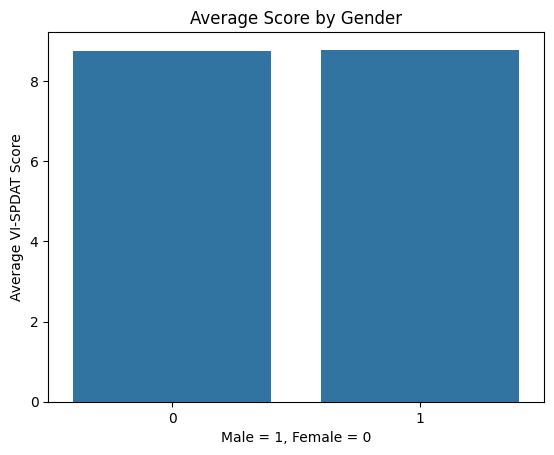

Average score for Race/Ethnicity_Latino: 8.80
Average score for Race/Ethnicity_Other: 8.75
Average score for Race/Ethnicity_White: 9.36


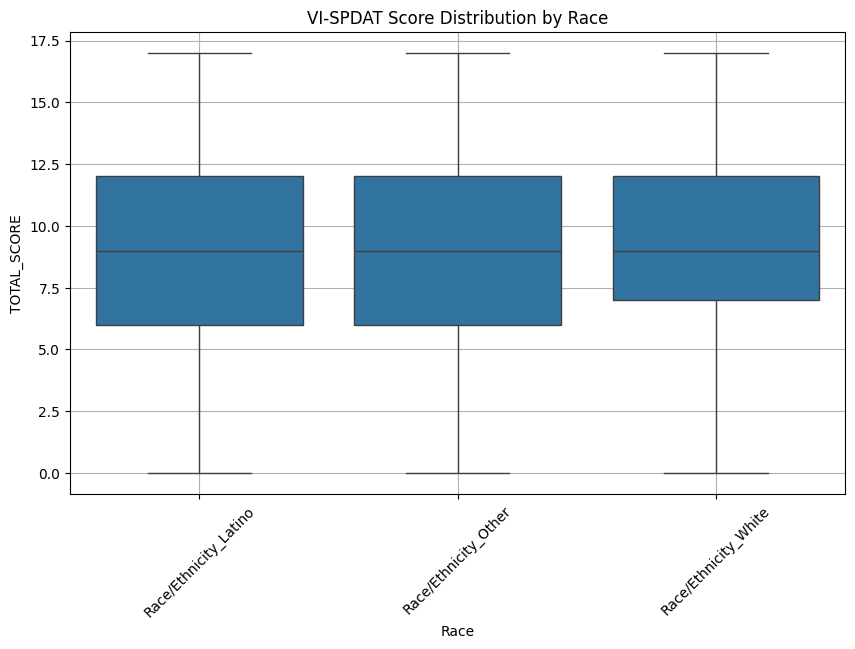

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of VI-SPDAT Total Score
plt.figure(figsize=(8, 5))
sns.histplot(df['TOTAL_SCORE'], bins=20, kde=True)
plt.title("Distribution of VI-SPDAT Total Score")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Average Score by Gender
gender_columns = [col for col in df.columns if 'Gender' in col]
gender_avg = df.groupby(gender_columns)['TOTAL_SCORE'].mean().reset_index()
sns.barplot(data=gender_avg, x='Gender_Male', y='TOTAL_SCORE')
plt.title("Average Score by Gender")
plt.xlabel("Male = 1, Female = 0")
plt.ylabel("Average VI-SPDAT Score")
plt.show()


# Average Score by Race
race_columns = [col for col in df.columns if 'Race/Ethnicity' in col]
for race_col in race_columns:
    avg_score = df[df[race_col] == 1]['TOTAL_SCORE'].mean()
    print(f"Average score for {race_col}: {avg_score:.2f}")


# Score Distribution by Race (Boxplot)
race_melted = df[race_columns + ['TOTAL_SCORE']].melt(id_vars='TOTAL_SCORE', var_name='Race', value_name='Is_Race')
race_melted = race_melted[race_melted['Is_Race'] == 1]

plt.figure(figsize=(10, 6))
sns.boxplot(data=race_melted, x='Race', y='TOTAL_SCORE')
plt.xticks(rotation=45)
plt.title("VI-SPDAT Score Distribution by Race")
plt.grid(True)
plt.show()


## Supervised Learning Part 1: Polynomial Regression

In [ ]:
##POLYNOMIAL REGRESSION DEGREE 2
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare regression data
X = df[combined_features]
y = df['TOTAL_SCORE']

# Split and transform
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit and evaluate
model = LinearRegression()
model.fit(X_poly_train, y_train)
preds = model.predict(X_poly_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

print(f"Polynomial Regression Results:\nMSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

Polynomial Regression Results:
MSE: 0.14, RMSE: 0.37, R²: 0.99


## Supervised Learning Part 2: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10210
           1       1.00      0.97      0.99     16153

    accuracy                           0.98     26363
   macro avg       0.98      0.99      0.98     26363
weighted avg       0.98      0.98      0.98     26363



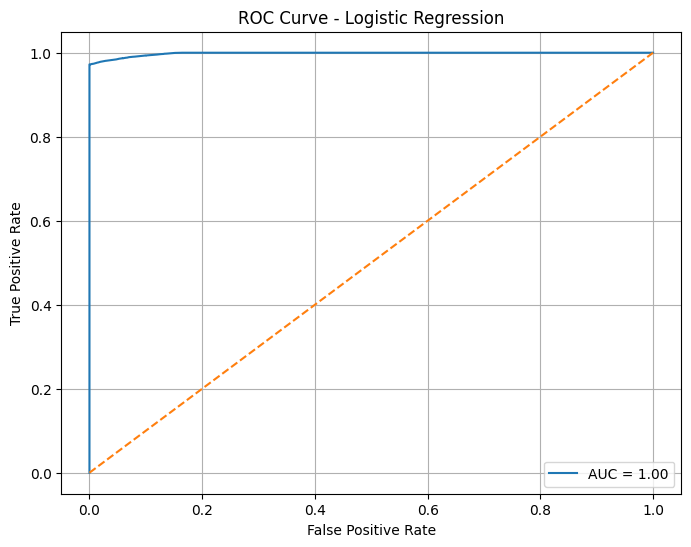

In [ ]:
# Prepare classification data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X = df[combined_features]
y = df['High_Risk']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)[:, 1]

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_preds))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

<Figure size 600x500 with 0 Axes>

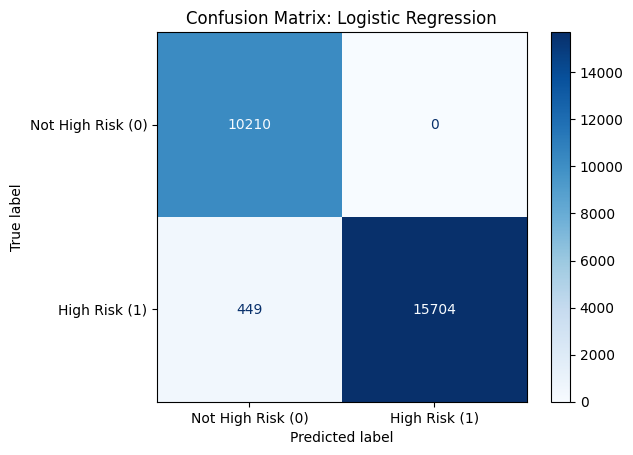

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions (if not already done)
y_preds = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not High Risk (0)", "High Risk (1)"])

# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Logistic Regression")
plt.grid(False)
plt.show()


## Regularization for Overfitting Reduction


In [ ]:
#RIDGE REGRESSION (L2)

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Features and target
X = df[combined_features]
y = df['TOTAL_SCORE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
ridge_preds = ridge.predict(X_test_poly)

# Evaluation
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_preds)

print(f"Ridge Regression - MSE: {ridge_mse:.2f}, RMSE: {ridge_rmse:.2f}, R²: {ridge_r2:.2f}")


Ridge Regression - MSE: 0.14, RMSE: 0.37, R²: 0.99


In [ ]:
##LASSO
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_poly, y_train)
lasso_preds = lasso.predict(X_test_poly)

lasso_mse = mean_squared_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_preds)

print(f"Lasso Regression - MSE: {lasso_mse:.2f}, RMSE: {lasso_rmse:.2f}, R²: {lasso_r2:.2f}")


Lasso Regression - MSE: 0.28, RMSE: 0.53, R²: 0.98


In [ ]:
###Logistic regression with L2 Regularization
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Scale features for logistic regression
X_class = df[combined_features]
y_class = df['High_Risk']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_class)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

#L2-regularized logistic regression
logreg = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
logreg.fit(X_train, y_train)
y_preds = logreg.predict(X_test)

print("Classification Report (L2 Logistic Regression):")
print(classification_report(y_test, y_preds))


Classification Report (L2 Logistic Regression):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10210
           1       1.00      0.97      0.99     16153

    accuracy                           0.98     26363
   macro avg       0.98      0.99      0.98     26363
weighted avg       0.98      0.98      0.98     26363



In [ ]:
##Coefficient comparison for regularization methods
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Set up data
X = df[combined_features]
y = df['TOTAL_SCORE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial transform
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# Get feature names from PolynomialFeatures
feature_names = poly.get_feature_names_out(input_features=combined_features)

# Train models
linreg = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

linreg.fit(X_train_poly, y_train)
ridge.fit(X_train_poly, y_train)
lasso.fit(X_train_poly, y_train)

# Create DataFrame for comparison
coef_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Linear': linreg.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

# Sort by absolute size of unregularized coefficients
coef_comparison['Abs_Linear'] = np.abs(coef_comparison['Linear'])
coef_comparison_sorted = coef_comparison.sort_values('Abs_Linear', ascending=False).drop(columns='Abs_Linear')

# Show the top 15 feature rows
coef_comparison_sorted.head(15)


,Feature,Linear,Ridge,Lasso
0,WELLNESS_SUB_SCORE,1.061548,1.061531,0.885638
1,RISKS_SUB_SCORE,0.988501,0.988459,0.611703
3,HISTORY_SUB_SCORE,0.977101,0.976481,0.000000
2,SOCIALIZATION_SUB_SCORE,0.970618,0.970487,0.048587
35,Gender_Male Race/Ethnicity_Latino,-0.042806,-0.042796,-0.000000
43,Race/Ethnicity_White^2,0.041954,0.041896,0.000000
7,Race/Ethnicity_White,0.041954,0.041896,0.000000
36,Gender_Male Race/Ethnicity_Other,-0.037009,-0.036955,-0.000000
37,Gender_Male Race/Ethnicity_White,-0.028368,-0.028348,0.000000
34,Gender_Male^2,0.024531,0.024456,0.000000


## Model Evaluation


In [ ]:
from sklearn.metrics import f1_score
#The F1 score balances the model’s ability to identify actual high-risk individuals (recall) and avoid mistakingly assigning high risk to others (precision).

f1_by_group = {}

# Define race_cols and gender_cols
race_cols = [col for col in df.columns if 'Race/Ethnicity' in col]  # Assuming 'df' is your DataFrame
gender_cols = [col for col in df.columns if 'Gender' in col] # Assuming 'df' is your DataFrame
group_cols = race_cols + gender_cols

# Add true and predicted labels to a test data frame
X_test_df = pd.DataFrame(X_test, columns=combined_features)
X_test_df['true_label'] = y_test.values
X_test_df['pred_label'] = logreg.predict(X_test)

# Loop through groups and calculate F1 Score per subgroup
for group in group_cols:
    group_data = X_test_df[X_test_df[group] == 1]
    # Check if the group has enough data for F1 score calculation
    # and handle multiclass targets by using 'weighted' average
    if group_data['true_label'].nunique() > 1:
        f1 = f1_score(group_data['true_label'], group_data['pred_label'], average='weighted') # Change average to 'weighted'
        f1_by_group[group] = round(f1, 3)

f1_by_group

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


{'Race/Ethnicity_Latino': 0.0,
 'Race/Ethnicity_Other': 0.0,
 'Race/Ethnicity_White': 0.0,
 'Gender_Male': 0.0}

In [ ]:
import numpy as np
np.unique(X_test_df['pred_label'], return_counts=True)
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[combined_features])
y = df['High_Risk']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression with CV for tuning C
log_cv = LogisticRegressionCV(
    Cs=[0.01, 0.1, 1, 10, 100],
    cv=5,
    penalty='l2',
    scoring='roc_auc',
    max_iter=1000,
    class_weight='balanced',
    solver='liblinear'
)

# Fit model
log_cv.fit(X_train, y_train)

# Predictions
y_preds = log_cv.predict(X_test)
y_probs = log_cv.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_preds))
print(f"AUC: {roc_auc_score(y_test, y_probs):.3f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10384
           1       1.00      0.97      0.99     16379

    accuracy                           0.98     26763
   macro avg       0.98      0.99      0.98     26763
weighted avg       0.98      0.98      0.98     26763

AUC: 0.998


In [ ]:
# Step 1: Create the evaluation DataFrame
X_test_df = pd.DataFrame(X_test, columns=combined_features)
X_test_df['true_label'] = y_test.values
X_test_df['pred_label'] = log_cv.predict(X_test)
X_test_df['pred_prob'] = log_cv.predict_proba(X_test)[:, 1]

# Step 2: Add readable Race and Gender labels
X_test_df['Race'] = df.loc[X_test_df.index, [col for col in df.columns if 'Race/Ethnicity' in col]].idxmax(axis=1).str.replace('Race/Ethnicity_', '')
X_test_df['Gender'] = df.loc[X_test_df.index, 'Gender_Male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Step 3: Summarize by demographic group
group_summary = X_test_df.groupby(['Race', 'Gender']).agg(
    Count=('true_label', 'size'),
    Actual_High_Risk_Rate=('true_label', 'mean'),
    Predicted_High_Risk_Rate=('pred_label', 'mean'),
    Avg_Pred_Probability=('pred_prob', 'mean')
).reset_index()

# Step 4: View results
group_summary


,Race,Gender,Count,Actual_High_Risk_Rate,Predicted_High_Risk_Rate,Avg_Pred_Probability
0,Black,Female,5072,0.611002,0.593849,0.604594
1,Black,Male,9610,0.619043,0.602810,0.614385
2,Latino,Female,2014,0.612214,0.594340,0.604795
3,Latino,Male,4031,0.610518,0.589680,0.601566
4,Other,Female,364,0.634615,0.618132,0.629031
5,Other,Male,505,0.619802,0.609901,0.618416
6,White,Female,1472,0.589674,0.569973,0.584095
7,White,Male,3695,0.602165,0.583762,0.595224


## Predictive Model Testing (All Demographic Groups)


In [ ]:
# Simulate predictions for identical wellness profiles across race/gender groups

base_wellness = [5, 4, 3, 4]  # Example subscore values

demographic_profiles = {
    "White Male": ['Gender_Male', 'Race/Ethnicity_White'],
    "White Female": ['Race/Ethnicity_White'],
    "Black Male": ['Gender_Male', 'Race/Ethnicity_Black'],
    "Black Female": ['Race/Ethnicity_Black'],
    "Latino Male": ['Gender_Male', 'Race/Ethnicity_Latino'],
    "Latino Female": ['Race/Ethnicity_Latino'],
    "Other Male": ['Gender_Male', 'Race/Ethnicity_Other'],
    "Other Female": ['Race/Ethnicity_Other']
}

results = []
for label, demo_cols in demographic_profiles.items():
    profile = base_wellness + [1 if col in demo_cols else 0 for col in race_gender_features]
    scaled_profile = scaler.transform([profile])
    prob = log_cv.predict_proba(scaled_profile)[0, 1]
    results.append((label, round(prob, 4)))

import pandas as pd
demo_predictions = pd.DataFrame(results, columns=["Group", "Predicted Probability"])
demo_predictions.sort_values("Predicted Probability", ascending=False).reset_index(drop=True)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

,Group,Predicted Probability
0,White Male,1.0
1,White Female,1.0
2,Black Male,1.0
3,Black Female,1.0
4,Latino Male,1.0
5,Latino Female,1.0
6,Other Male,1.0
7,Other Female,1.0


## Predictive Model Testing- Outcomes for Black Female vs White Male (base, medium, low, randomized risk profiles)


In [ ]:
# Try a lower-risk profile
base_wellness = [1, 1, 1, 1]  # minimal risk on all subscores

# Repeat predictions with this lighter profile
results = []
for label, demo_cols in demographic_profiles.items():
    profile = base_wellness + [1 if col in demo_cols else 0 for col in race_gender_features]
    scaled_profile = scaler.transform([profile])
    prob = log_cv.predict_proba(scaled_profile)[0, 1]
    results.append((label, round(prob, 4)))

demo_predictions = pd.DataFrame(results, columns=["Group", "Predicted Probability"])
demo_predictions = demo_predictions.sort_values("Predicted Probability", ascending=False).reset_index(drop=True)
demo_predictions


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

,Group,Predicted Probability
0,White Male,0.0
1,White Female,0.0
2,Black Male,0.0
3,Black Female,0.0
4,Latino Male,0.0
5,Latino Female,0.0
6,Other Male,0.0
7,Other Female,0.0


In [ ]:
#Base wellness subscores assume that each risk factor is identical for both variables. In this example, the base wellness score is 1.

# Ensure your base wellness features are defined
base_wellness = [1, 1, 1, 1]  # Minimal risk scores for fairness test

# Define profiles using your race/gender dummy variables
# Adjust the column names if needed to match your dataset
black_female_profile = base_wellness + [
    0 if col == 'Gender_Male' else
    1 if col == 'Race/Ethnicity_Black' else
    0 for col in race_gender_features
]

white_male_profile = base_wellness + [
    1 if col in ['Gender_Male', 'Race/Ethnicity_White'] else
    0 for col in race_gender_features
]

# Scale the inputs using your previously trained scaler
black_female_scaled = scaler.transform([black_female_profile])
white_male_scaled = scaler.transform([white_male_profile])

# Predict probabilities
black_female_prob = log_cv.predict_proba(black_female_scaled)[0, 1]
white_male_prob = log_cv.predict_proba(white_male_scaled)[0, 1]

# Display results
print(f"Predicted Probability (Black Female): {black_female_prob:.4f}")
print(f"Predicted Probability (White Male):   {white_male_prob:.4f}")


Predicted Probability (Black Female): 0.0000
Predicted Probability (White Male):   0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Define medium- and high-risk wellness profiles
medium_wellness = [3, 3, 3, 3]  # medium risk scores
high_wellness = [5, 5, 5, 5]    # high risk scores

# Define the two demographic groups
demo_profiles = {
    "Black Female": ['Race/Ethnicity_Black'],
    "White Male": ['Gender_Male', 'Race/Ethnicity_White']
}

# Store results here
simulation_results = []

# Run predictions for each group and profile
for level, wellness_profile in [("Medium", medium_wellness), ("High", high_wellness)]:
    for label, demo_cols in demo_profiles.items():
        profile = wellness_profile + [1 if col in demo_cols else 0 for col in race_gender_features]
        scaled_profile = scaler.transform([profile])
        prob = log_cv.predict_proba(scaled_profile)[0, 1]
        simulation_results.append((label, level, round(prob, 4)))

# Format results as a DataFrame
import pandas as pd
profile_simulations = pd.DataFrame(simulation_results, columns=["Group", "Wellness_Level", "Predicted Probability"])
profile_simulations


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Group,Wellness_Level,Predicted Probability
0,Black Female,Medium,1.0
1,White Male,Medium,1.0
2,Black Female,High,1.0
3,White Male,High,1.0


In [ ]:
import numpy as np
import pandas as pd

# Settings
n_simulations = 50
risk_range = (0, 5)

# Demographic groups to test
demo_profiles = {
    "Black Female": ['Race/Ethnicity_Black'],
    "White Male": ['Gender_Male', 'Race/Ethnicity_White']
}

# Run randomized wellness simulations
sim_results = []

for i in range(n_simulations):
    wellness = np.random.randint(risk_range[0], risk_range[1]+1, size=4).tolist()

    for label, demo_cols in demo_profiles.items():
        demo_values = [1 if col in demo_cols else 0 for col in race_gender_features]
        profile = wellness + demo_values
        scaled_profile = scaler.transform([profile])
        prob = log_cv.predict_proba(scaled_profile)[0, 1]
        sim_results.append((label, wellness, round(prob, 4)))

# Format as DataFrame
sim_df = pd.DataFrame(sim_results, columns=["Group", "Wellness_Subscores", "Predicted_Probability"])
sim_df.head(10)  # preview first 10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

,Group,Wellness_Subscores,Predicted_Probability
0,Black Female,"[4, 5, 4, 1]",1.0000
1,White Male,"[4, 5, 4, 1]",1.0000
2,Black Female,"[4, 1, 1, 3]",1.0000
3,White Male,"[4, 1, 1, 3]",1.0000
4,Black Female,"[5, 1, 1, 3]",1.0000
5,White Male,"[5, 1, 1, 3]",1.0000
6,Black Female,"[1, 3, 1, 2]",0.1059
7,White Male,"[1, 3, 1, 2]",0.1694
8,Black Female,"[3, 0, 5, 0]",0.9934
9,White Male,"[3, 0, 5, 0]",0.9962
